In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/demographic.csv')
df2 = pd.read_csv('data/questionnaire.csv')

df = pd.concat([df1, df2], axis=1, join='inner')

df.head()

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  73557         8         2         1        69       NaN         4   
1  73558         8         2         1        54       NaN         3   
2  73559         8         2         1        72       NaN         3   
3  73560         8         2         1         9       NaN         3   
4  73561         8         2         2        73       NaN         3   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  WHD080U  WHD080L  WHD110  WHD120  \
0         4       1.0       NaN  ...      NaN     40.0   270.0   200.0   
1         3       1.0       NaN  ...      NaN      NaN   240.0   250.0   
2         3       2.0       NaN  ...      NaN      NaN   180.0   190.0   
3         3       1.0     119.0  ...      NaN      NaN     NaN     NaN   
4         3       1.0       NaN  ...      NaN      NaN   150.0   135.0   

   WHD130  WHD140  WHQ150  WHQ030M  WHQ500  WHQ520  
0    69.0   270.0    62.0      NaN     NaN     NaN  
1    72.0   250.0    25.0      NaN     NaN     NaN  
2    70.0   228.0    35.0      NaN     NaN     NaN  
3     NaN     NaN     NaN      3.0     3.0     3.0  
4    67.0   170.0    60.0      NaN     NaN     NaN  

[5 rows x 1000 columns]

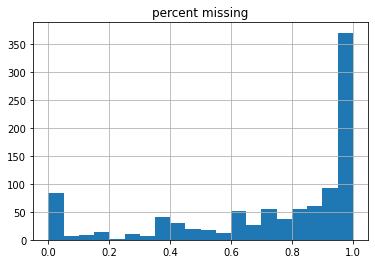

In [3]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent missing'])
pos = nas['percent missing'] > 0
nas[pos]
nas.hist(bins = 20)
acceptable_feats = nas.loc[nas['percent missing'] < 0.2]
list_acceptable_feats = list(acceptable_feats.index)

In [4]:
print('Shape of DataFrame with all data: ', df.shape)
df = df.loc[(df.RIDAGEYR >= 18)]
print('Shape of DataFrame with only 20 year olds and older: ', df.shape)

Shape of DataFrame with all data:  (10175, 1000)
Shape of DataFrame with only 20 year olds and older:  (6113, 1000)


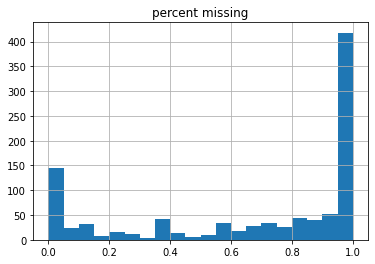

In [5]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent missing'])
pos = nas['percent missing'] > 0
nas[pos]
nas.hist(bins = 20)
acceptable_feats = nas.loc[nas['percent missing'] < 0.2]
list_acceptable_feats = list(acceptable_feats.index)

In [6]:
c = df[list_acceptable_feats].corr().abs()
dc = c['DPQ020'].dropna().sort_values(kind="quicksort", ascending=False)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
print(dc.head(20))
c = df.corr().abs()
#plt.figure(figsize=(300, 300))
#sns.heatmap(c, xticklabels=c.columns, yticklabels=c.columns, linewidths=.5)

DPQ020    1.000000
DPQ060    0.555014
DPQ010    0.501361
DPQ070    0.450393
DPQ040    0.439801
DPQ050    0.393860
DPQ080    0.370429
DPQ030    0.362785
DPQ090    0.321758
DLQ040    0.277462
PFQ049    0.269184
HSD010    0.265207
HUQ010    0.262061
DLQ050    0.233651
PFQ057    0.230385
PFQ051    0.220686
DLQ080    0.214893
SLQ050    0.213349
PFQ054    0.179000
DLQ060    0.177252
Name: DPQ020, dtype: float64


In [7]:
df = df[list_acceptable_feats]
df = df[df.DPQ020.notna()]

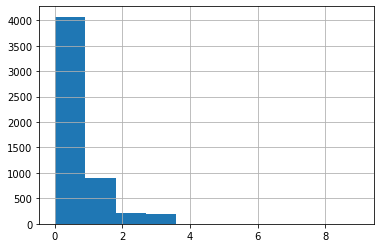

In [8]:
df.DPQ020.hist()

In [9]:
df = df[df.DPQ020 < 7]

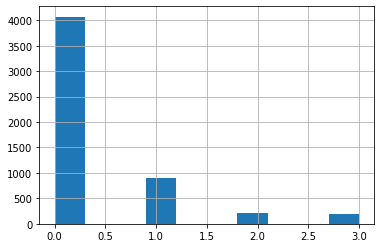

In [10]:
df.DPQ020.hist()

In [11]:
df.loc[(df.DPQ020 > 1)]=1

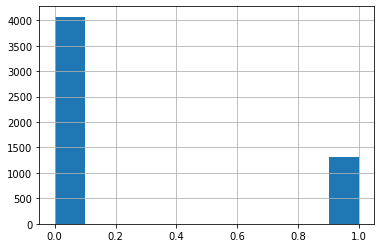

In [12]:
df.DPQ020.hist()

In [13]:
from sklearn.impute import KNNImputer
import time

tic = time.time()

col_names = list(df.columns)

print('Before imputation: ', df.isnull().sum().sum(), 'missing')

#fill na's with medians
#for col in df.columns:
#    df[col] = df[col].fillna((df[col].median()))
    
#fill na's using KNN
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df))
      
print('After imputation: ', df.isnull().sum().sum(), 'missing')

df.columns = col_names

toc = time.time()
print('runtime: ',toc-tic)

Before imputation:  19997 missing
After imputation:  0 missing
runtime:  14.69852900505066


In [14]:
print('Shape of DataFrame before dropping unwanted features: ', df.shape)
remove_list = ['SIAPROXY','SDMVSTRA','SMAQUEX.y','RIDSTATR','HSAQUEX','MIAPROXY','SMAQUEX.x','SDDSRVYR','FIAPROXY','SEQN','DPQ010','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090','DPQ100']#['DIQ160', 'DIQ050', 'DIQ180', 'DIQ172', 'DIQ170']#, 'SLQ060', 'SIAPROXY', 'HUQ010', 'HUQ010', 'DMDHRAGE', 'DLQ060', 'RIDAGEYR', 'DLQ050', 'WTINT2YR', 'WTMEC2YR']
keep_list = set(df.columns) - set(remove_list)
df = df[keep_list]
prefix_list = []#['MCQ','HUQ','BPQ','PFQ','DLQ','HSD', 'OHQ', 'WHQ', 'SEQN', 'DPQ', 'HIQ', 'HSQ', 'WHD', 'DMD', 'DBQ']
df = df.loc[:,~df.columns.str.startswith(tuple(prefix_list))]
print('Shape of DataFrame after dropping unwanted features: ', df.shape)

c1 = df.corr().abs()
dc1 = c1['DPQ020'].dropna().sort_values(kind="quicksort", ascending=False)

df = df[list(dc1.index)[:36]]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dc1)


Shape of DataFrame before dropping unwanted features:  (5390, 209)
Shape of DataFrame after dropping unwanted features:  (5390, 188)
DPQ020      1.000000
SMQ863      0.499702
MCQ160G     0.484342
DLQ060      0.456981
DLQ040      0.448717
SMQ851      0.446463
MCQ086      0.430422
FIAINTRP    0.426740
MCQ082      0.422434
PFQ057      0.421669
MCQ203      0.417846
MCQ160O     0.417612
SIAINTRP    0.415959
FSD032C     0.414022
DLQ080      0.411012
DLQ020      0.409020
DLQ050      0.408845
DIQ050      0.408181
PFQ049      0.405292
FSD032B     0.401615
MIAINTRP    0.399386
PFQ054      0.396311
PFQ090      0.389860
MCQ053      0.386878
HUQ090      0.386393
MCQ160B     0.386216
HSQ510      0.384629
DLQ010      0.383452
FSD151      0.383230
MCQ160F     0.381026
MCQ160D     0.372880
MCQ160E     0.372790
FSD032A     0.371892
MCQ070      0.367260
DIQ160      0.366038
MCQ160N     0.365160
MCQ160K     0.364407
SLQ050      0.359479
MCQ220      0.354110
INQ132      0.351400
OHQ770      0.342695
HSQ571

In [15]:
from sklearn import preprocessing

X = df.drop('DPQ020', 1)
y = df['DPQ020']

#Dummy variables
dummy_list = []
for col in df.drop('DPQ020', 1).columns:
    if df[col].max() <= 99:
        dummy_list.append(col)
X = pd.get_dummies(X, prefix=dummy_list, columns=dummy_list)

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X)

In [16]:
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [17]:
import time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

tic = time.time()

# Initialize our classifier
clf = RandomForestClassifier(max_depth=200, n_estimators=100, max_features=100)

# Train our classifier
model = clf.fit(X_train, y_train)

# Make predictions
preds = clf.predict(X_test)
print(preds)

# Evaluate accuracy
print(accuracy_score(y_test, preds))

toc = time.time()
print('runtime: ',toc-tic)

[0. 0. 1. ... 0. 0. 1.]
0.8167655786350149
runtime:  2.0734009742736816


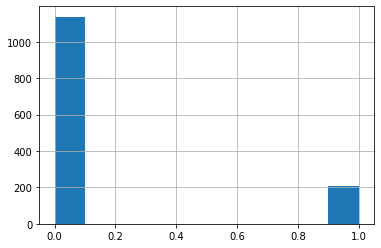

In [18]:
pd.Series(preds).hist()

In [19]:
results = pd.DataFrame(y_test)
results.columns = ['y_test']
results['preds'] = preds
results.head()

y_test  preds
0     0.0    0.0
1     0.0    0.0
2     0.0    1.0
3     0.0    0.0
4     0.0    0.0

In [20]:
true_pos = 0
true_neg = 0

for i in range(results.shape[0]):
    if results.iloc[i][0] == 1 and results.iloc[i][1] == 1:
        true_pos += 1
    elif results.iloc[i][0] == 0 and results.iloc[i][1] == 0:
        true_neg += 1

print('True Positive Rate: ', true_pos/results[results.y_test ==  1].shape[0])
print('True Negative Rate: ', true_neg/results[results.y_test ==  0].shape[0])

True Positive Rate:  0.4430769230769231
True Negative Rate:  0.9354838709677419
